# Homework 2 MLE and Naive Bayes

## MLE

### T1 and OT1

see the other file



## Simple Bayes Classifier

### T2





In [129]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
import math
import matplotlib.pyplot as plt

intersect: x =  2.5


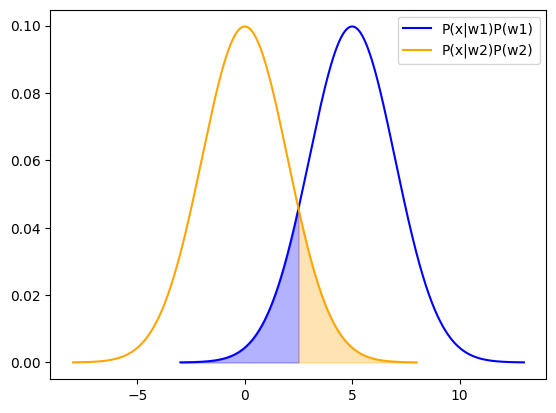

In [130]:
def plot_bayes_classifier(mu_1, mu_2, vars_1, vars_2, p_w1, p_w2, intersect_x=None):
  x_1 = np.linspace(mu_1 - 4*vars_1, mu_1 + 4*vars_1, 10000)
  y_1 = stats.norm.pdf(x_1, mu_1, vars_1) * p_w1
  x_2 = np.linspace(mu_2 - 4*vars_2, mu_2 + 4*vars_2, 10000)
  y_2 = stats.norm.pdf(x_2, mu_2, vars_2) * p_w2

  if(intersect_x is None):
    intersect_x = (2*vars_1**2*math.log(p_w2) - 2*vars_2**2*math.log(p_w1) + mu_1**2 - mu_2**2) / (2 * mu_1 - 2 * mu_2)
  print("intersect: x = ", intersect_x)

  plt.plot(x_1, y_1, label='P(x|w1)P(w1)', color='blue')
  plt.fill_between(x_1[x_1 < intersect_x], y_1[x_1 < intersect_x], color='blue', alpha=0.3)
  plt.plot(x_2, y_2, label='P(x|w2)P(w2)', color='orange')
  plt.fill_between(x_2[x_2 > intersect_x], y_2[x_2 > intersect_x], color='orange', alpha=0.3)
  plt.legend()
  plt.show()

vars = 2
mu_1 = 5
mu_2 = 0
p_w1 = 0.5
p_w2 = 0.5
plot_bayes_classifier(mu_1, mu_2, vars, vars, p_w1, p_w2)

### T3

intersect: x =  1.6211101690655123


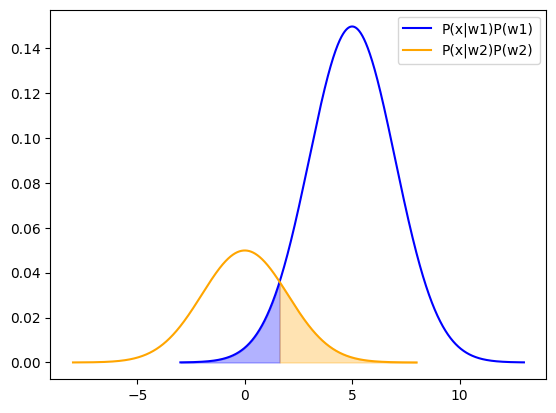

In [131]:
vars = 2
mu_1 = 5
mu_2 = 0
p_w1 = 0.75
p_w2 = 0.25
plot_bayes_classifier(mu_1, mu_2, vars, vars, p_w1, p_w2)

### OT2

see the other file

### OT3

Find new intersect_x

From P(x|w1) = P(x|w2)
1/sqrt(2*pi)/2*exp(-1/2*((x-4)^2)/2^2) = 1/sqrt(2*pi)/4*exp(-1/2*((x-0)^2)/4^2) 
x = -4 / 3 * (-4 + sqrt(4 + log(64)))

intersect: x =  1.5248321797187168


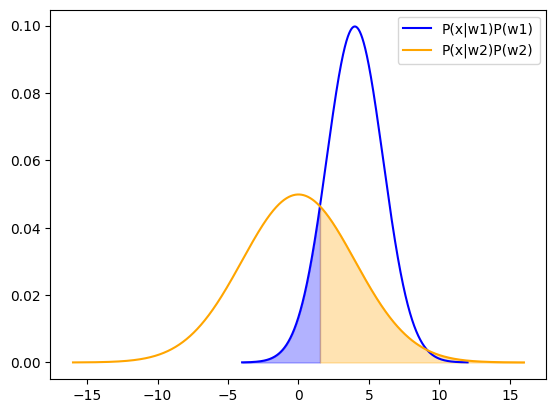

In [132]:
vars1 = 2
vars2 = 4
mu_1 = 4
mu_2 = 0
p_w1 = 0.5
p_w2 = 0.5
intersect_x =  -4 / 3 * (-4 + math.sqrt(4 + math.log(64)))
plot_bayes_classifier(mu_1, mu_2, vars1, vars2, p_w1, p_w2, intersect_x=intersect_x)

## Employee Attrition Prediction


### read CSV

In [133]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [134]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [135]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [136]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes

# HANDLE NULL NUMBERS
# INSERT CODE HERE
for col in df.columns:
    if df[col].dtype == np.float64:
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [137]:
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['Attrition'], random_state=42)

### Display histogram of each feature

In [138]:
def display_histogram(df, feature, n_bin = 40):
        
        df_dropna = df[feature].dropna()
        plt.hist(df_dropna, n_bin)
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()
    # INSERT CODE HERE

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

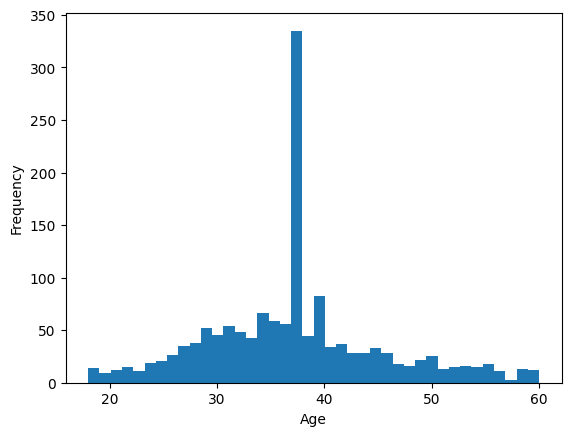

Zero bin count of Age 0


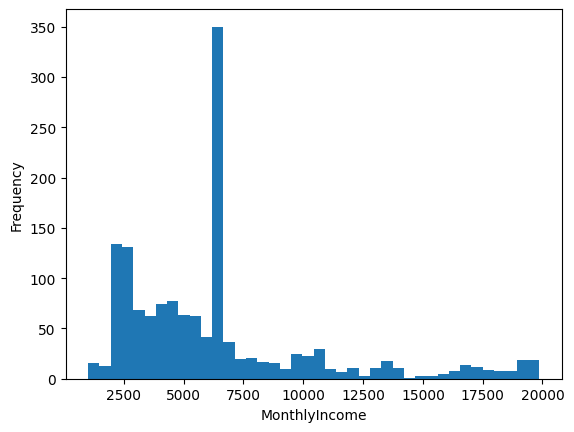

Zero bin count of MonthlyIncome 0


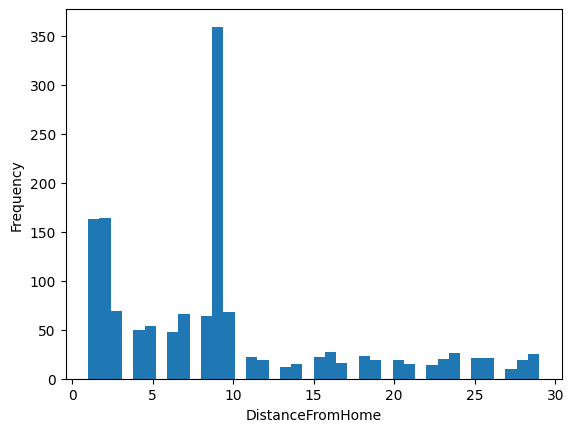

Zero bin count of DistanceFromHome 11


In [139]:
def count_zero_bins(df, col_name, n_bins):
    df_drop_na = df[col_name].dropna()
    hist, bin__edge = np.histogram(df_drop_na, bins=n_bins)
    return np.count_nonzero(hist == 0)

features = ["Age", "MonthlyIncome", "DistanceFromHome"]
for feature in features:
    display_histogram(df, feature)
    print("Zero bin count of", feature, count_zero_bins(df, feature, n_bins=40))



From having no zero bins, the Age and MonthlyIncome features are good discretiztion.

While, the DistanceFromHome feature is not.

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

Only the Age feature one can be estimated as Guassian since the rest don't look like a Normal Distribution.

The MonthlyIncome and DistanceFromHome features may be estimated using GMM or other distributions.

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

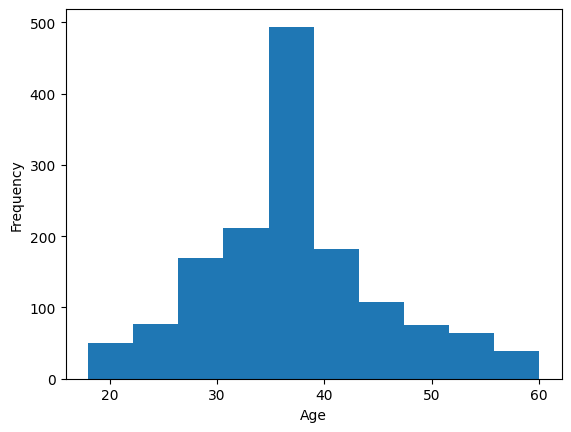

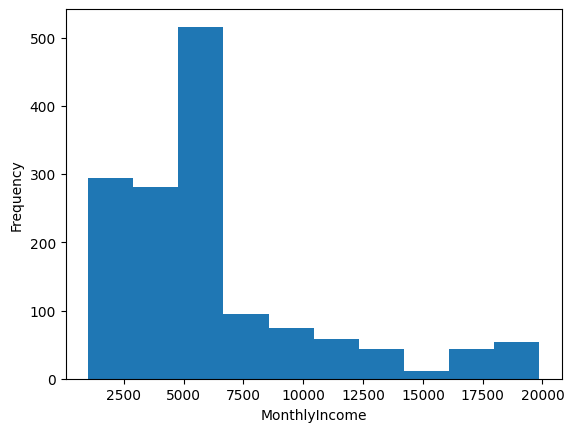

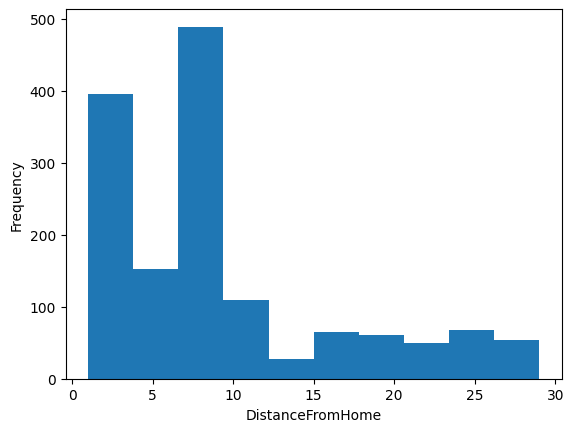

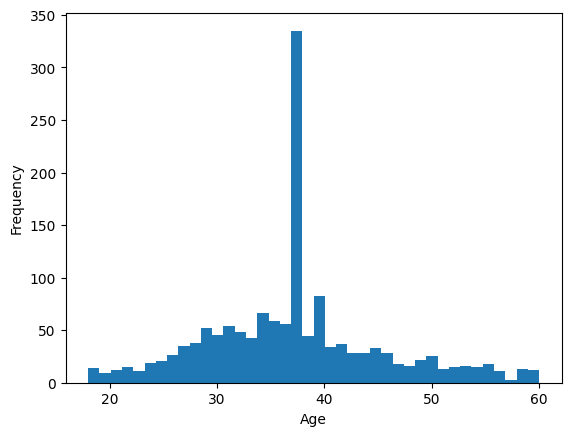

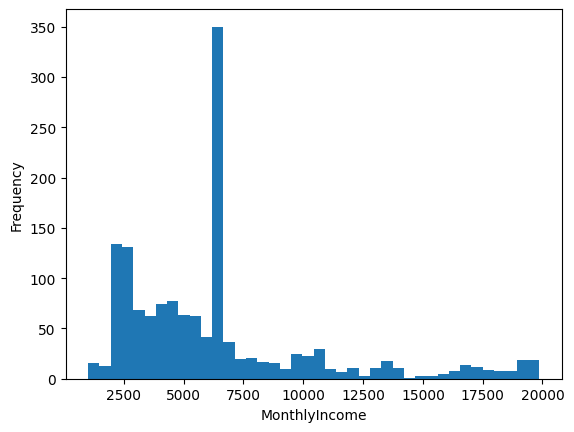

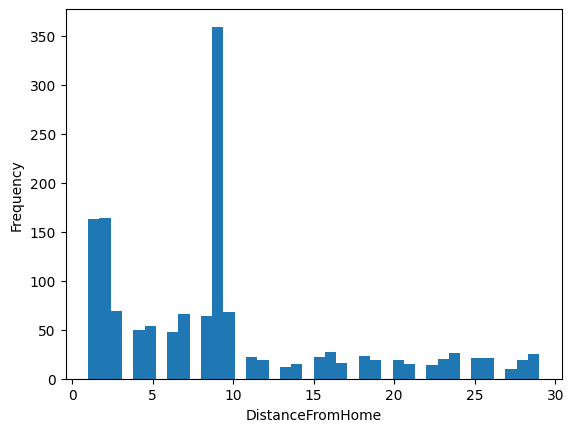

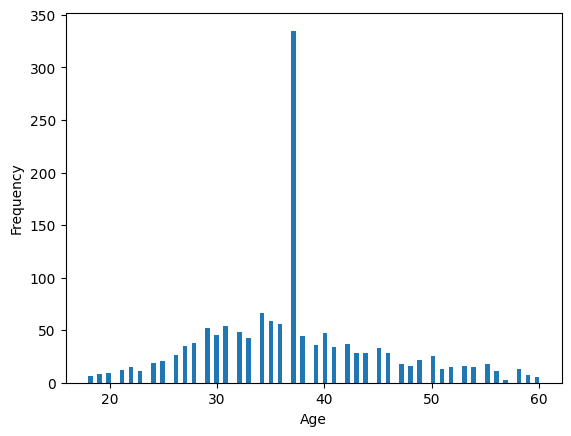

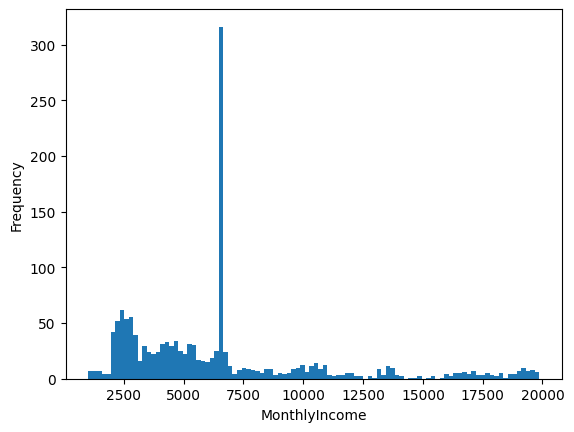

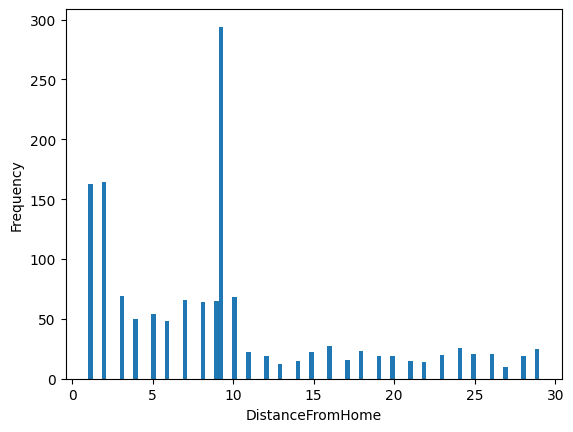

In [140]:
bins = [10, 40, 100]

for bin in bins:
    for feature in features:
        display_histogram(df, feature, n_bin=bin)


For Age, the appropriate bins would be 10 because it can accurately describe the distribution of data. Not too rough and not too detailed.

For MonthlyIncome, the optimal bins are 40 because the data is highly distrubuted.

For DistanceFromHome, the appropriate bins are 10 because the DistanceFromHome data Will only be in a narrow range, no need to use many bins

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

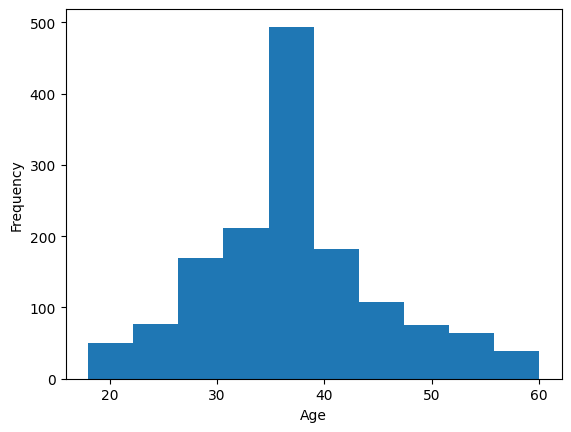

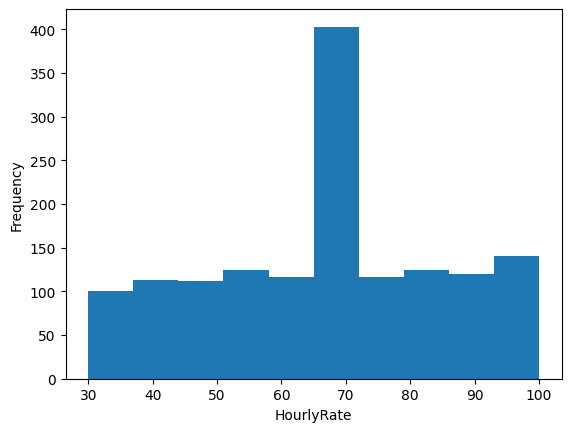

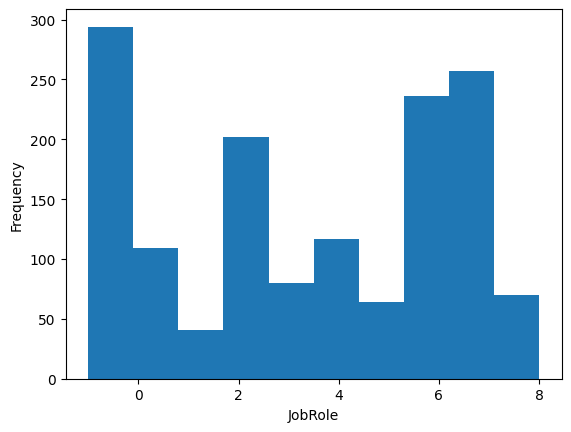

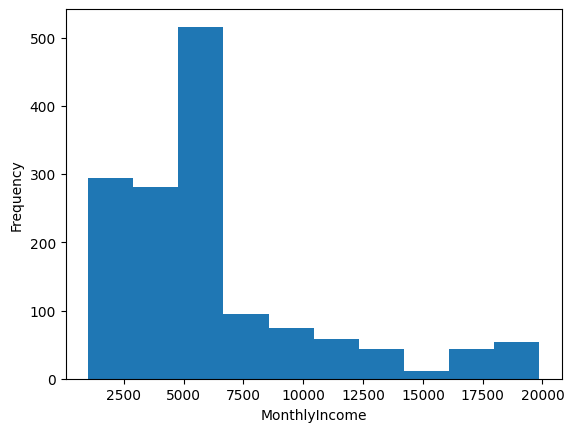

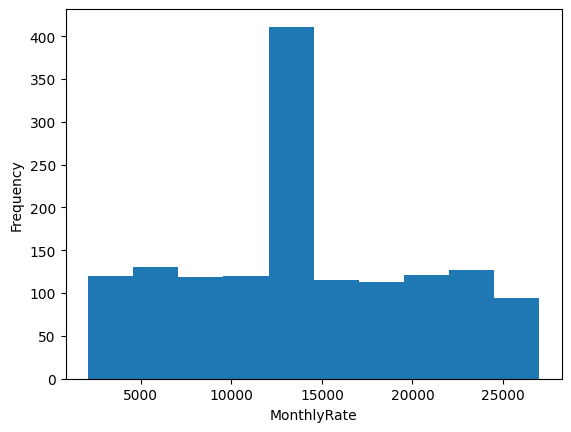

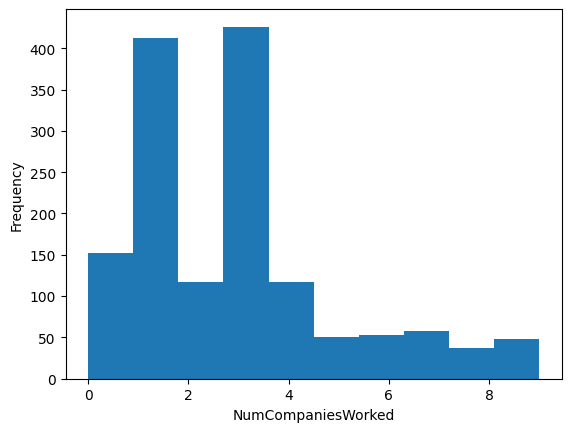

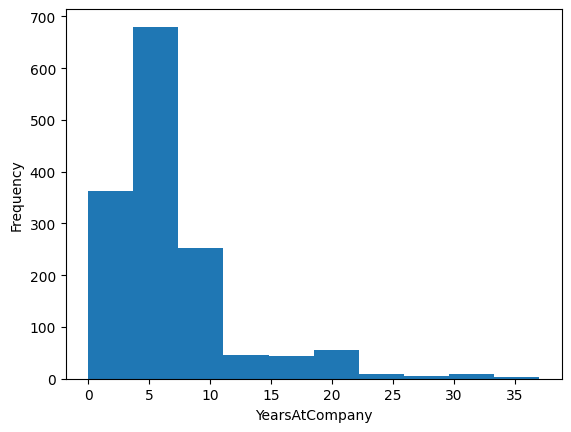

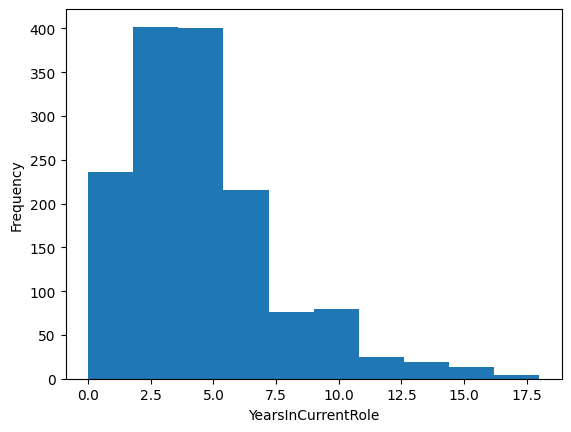

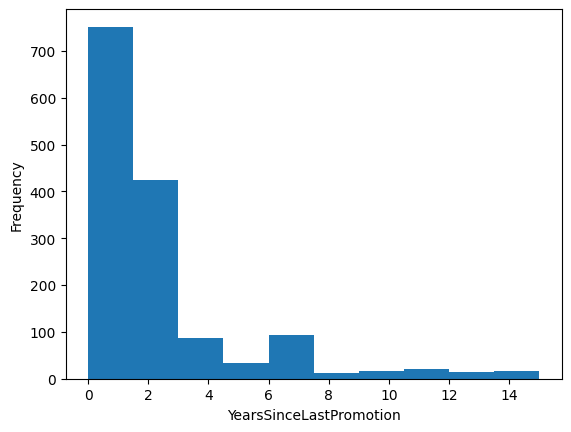

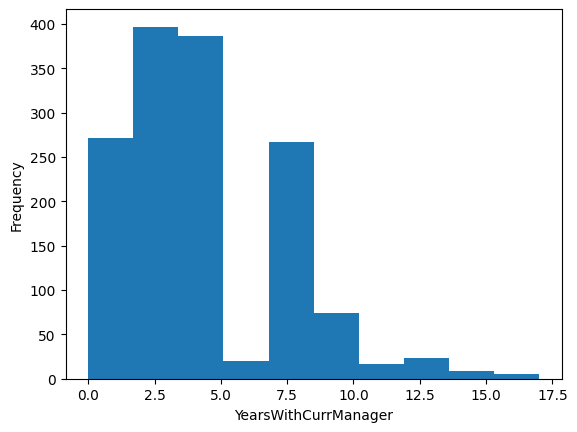

['Age', 'DailyRate', 'DistanceFromHome', 'EducationField', 'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [141]:
features = df.columns.to_list()
features.remove("Attrition")
for feature in features:
    if len(df[feature].unique()) < 10:
        features.remove(feature)
        continue
    display_histogram(df, feature, 10)

print(features)

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

If consider every features, Categorical Distribution because it is a discrete probability distribution whose sample space is the set of k individually identified items.

But if considering each of them,

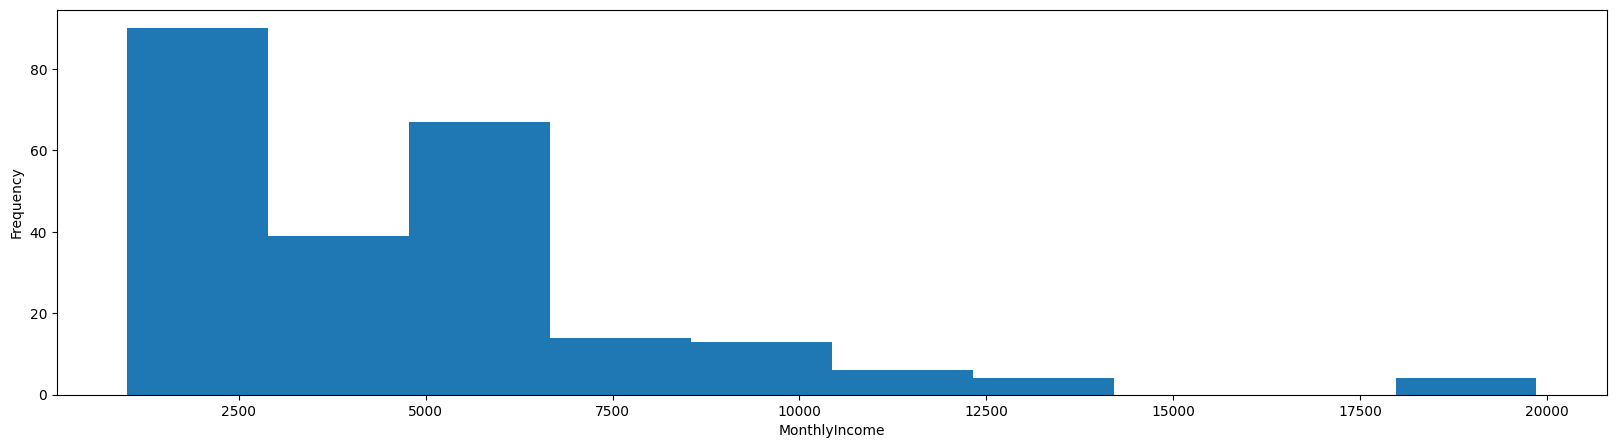

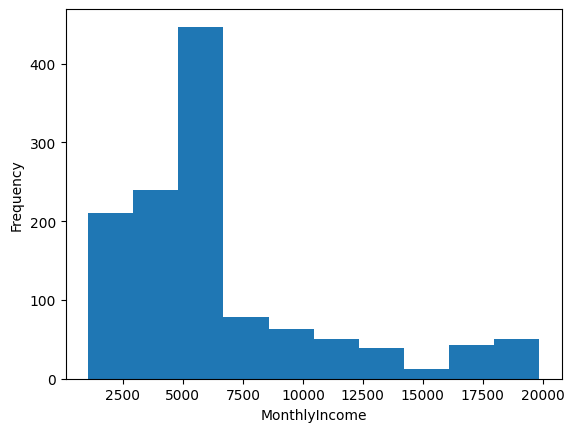

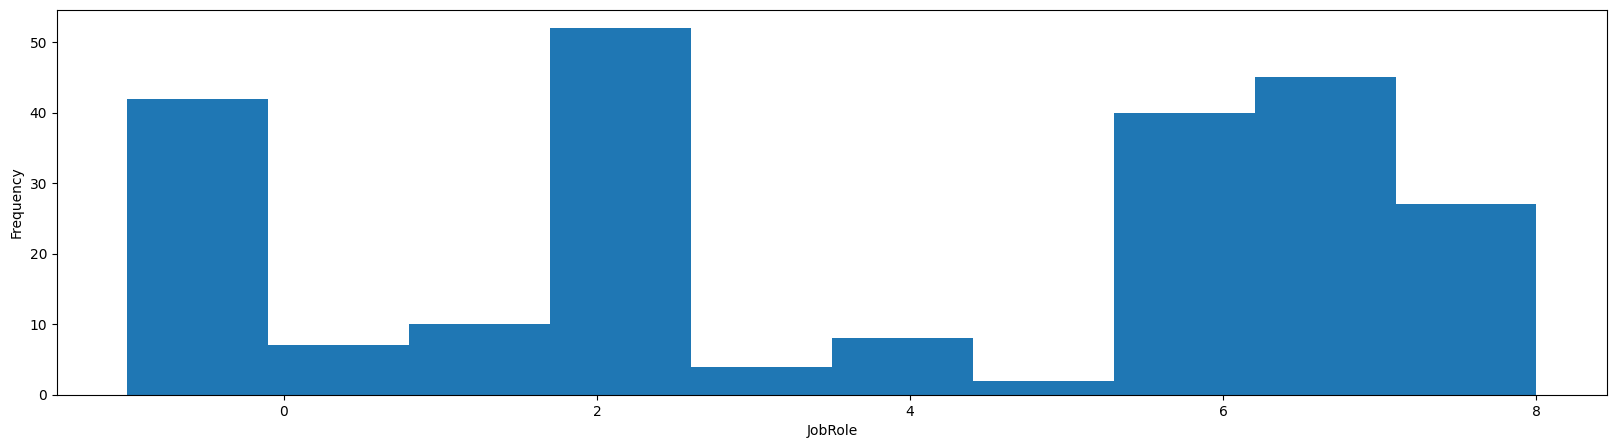

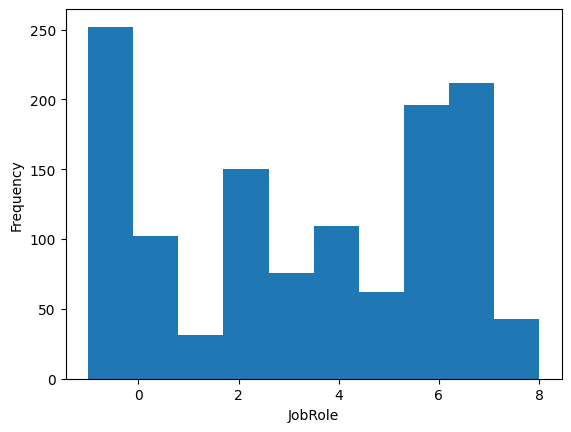

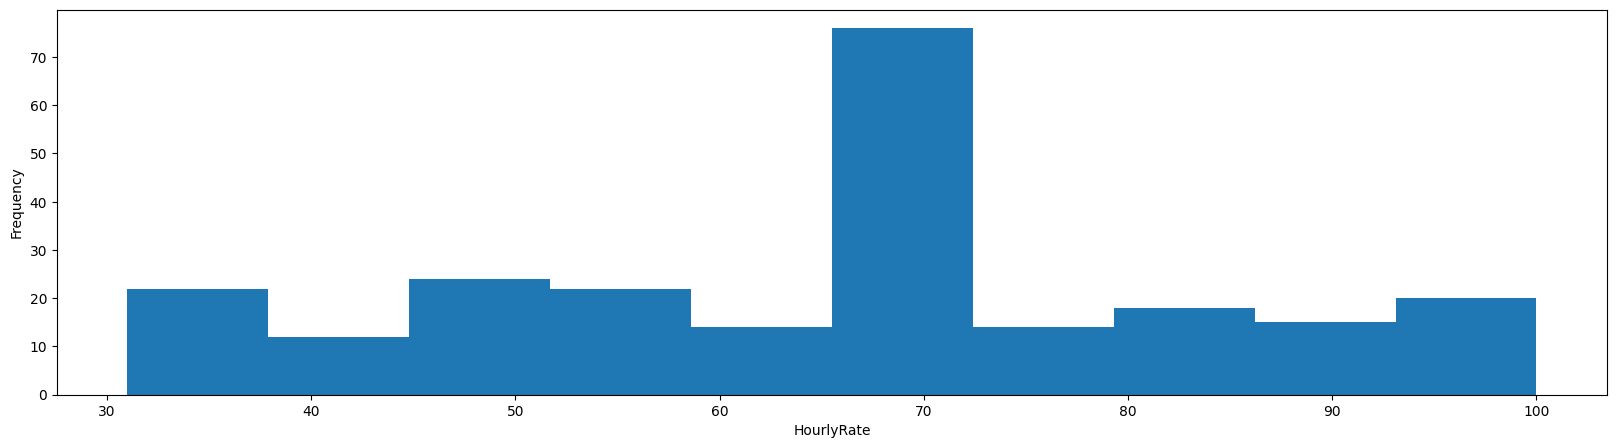

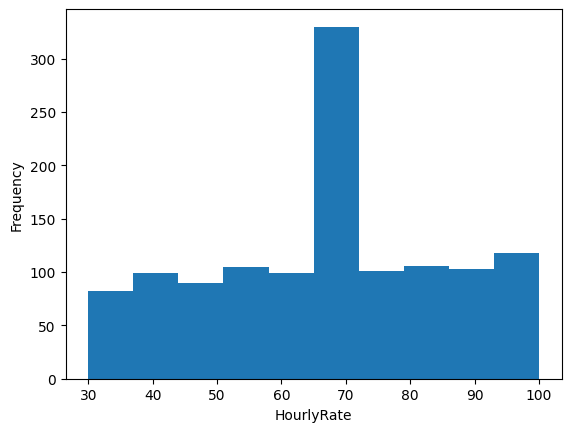

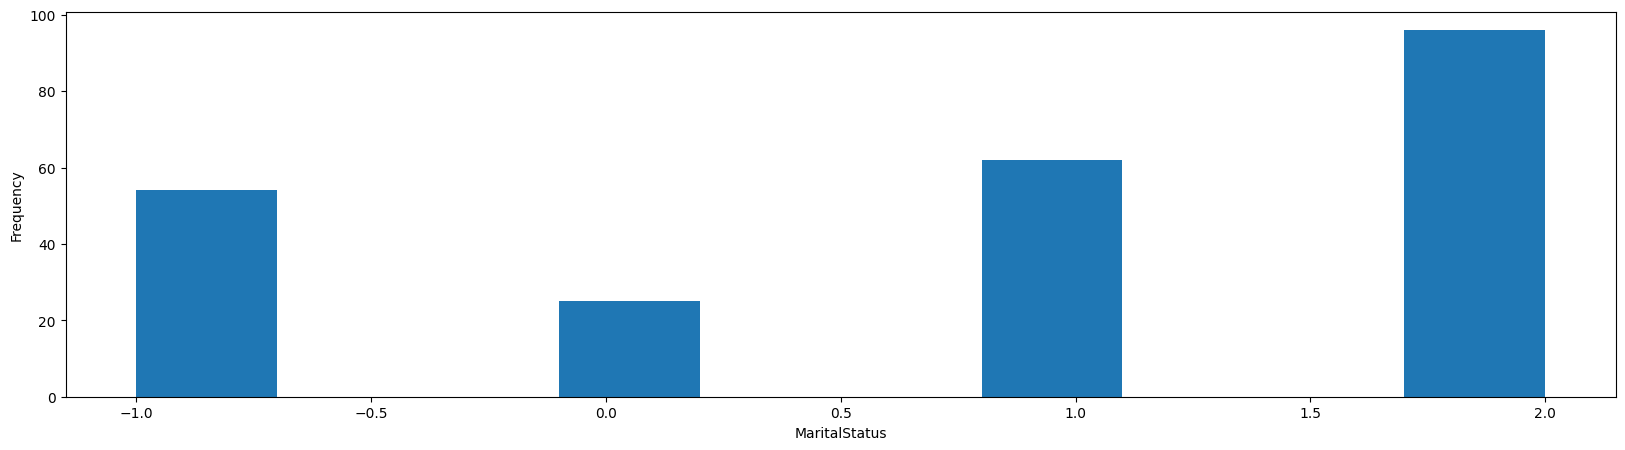

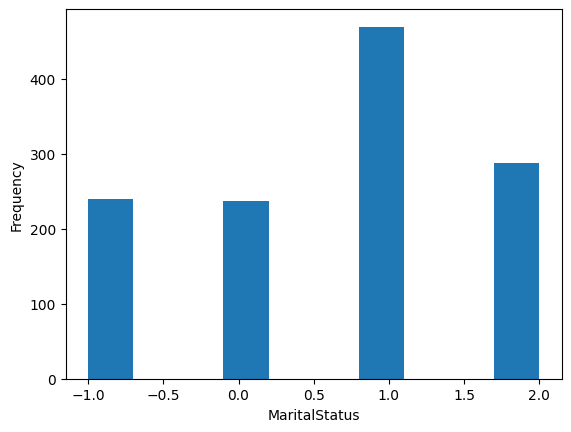

In [142]:
for col in ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']:
    plt.figure(figsize=(20, 5))
    leave_df = df.loc[df['Attrition'] == 1]
    stay_df = df.loc[df['Attrition'] == 0]

    display_histogram(leave_df, col, 10)

    display_histogram(stay_df, col, 10)



From the distribution, I chose Exponential Distribution.
p(x|\lambda) = \lambda * exp(-\lambda x)

The process to find MLE is
1. find the likelihood for each feature
2. find the derivative of sum of log of all likelihoods
3. set the derivative to zero and solve for the value that maximize the likelihoods


### T9. What is the prior distribution of the two classes?

In [143]:
p_leave = df.loc[df['Attrition'] == 1, 'Attrition'].count() / df.shape[0]
p_stay = df.loc[df['Attrition'] == 0, 'Attrition'].count() /df.shape[0]

print("leave", p_leave)
print("stay", p_stay)

leave 0.16122448979591836
stay 0.8387755102040816


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

Use flooring for handling zeros by changing them to small numbers (e.g. 1e-20)

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [144]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [145]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [146]:
test_size = 0.1

X = df_train.drop(columns=['Attrition']).to_numpy()
Y = df_train['Attrition'].to_numpy()

x_train = X[:-int(len(X) * test_size)]
y_train = Y[:-int(len(X) * test_size)]

x_test = X[-int(len(X) * test_size):]
y_test = Y[-int(len(X) * test_size):]

In [147]:
model = SimpleBayesClassifier(n_pos = (y_train==1).sum(), n_neg = (y_train==0).sum())

model.prior_pos, model.prior_neg

(0.15449202350965574, 0.8455079764903443)

In [148]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (0.375, 0.625)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1, 0)
    
check_prior()

In [149]:
model.fit_params(x_train, y_train)

([(array([0.01787488, 0.04170804, 0.10923535, 0.14399206, 0.34558093,
          0.13108242, 0.0754717 , 0.05958292, 0.05064548, 0.02482622]),
   array([-inf, 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8,  inf])),
  (array([0.20754717, 0.        , 0.        , 0.08838133, 0.        ,
          0.        , 0.14399206, 0.        , 0.        , 0.56007944]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.08142999, 0.06454816, 0.08043694, 0.09632572, 0.25819265,
          0.07646475, 0.07447865, 0.09235353, 0.09731877, 0.07845084]),
   array([  -inf,  241.7,  381.4,  521.1,  660.8,  800.5,  940.2, 1079.9,
          1219.6, 1359.3,    inf])),
  (array([0.19662363, 0.        , 0.        , 0.0367428 , 0.        ,
          0.        , 0.53723932, 0.        , 0.        , 0.22939424]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.26613704, 0.10228401, 0.34756703, 0.0734856 , 0.01787488,
          0.03

In [150]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  inf]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]

LEAVE PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  4.2  4.4

In [151]:
y_pred = model.predict(x = x_test)

c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])


In [152]:
def evaluate(y_true, y_pred, show_result = True):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp+tn+fp+fn + 1e-7)
    precision = tp / (tp + fp + 1e-7)
    recall = tp / (tp + fn + 1e-7)
    F1 = 1 / (1/(precision+1e-7) + 1/(recall+1e-7))
    fpr = fp / (fp + tn + 1e-7)

    if show_result:
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1: {F1:.2f}")
        print(f"False Positive Rate: {fpr:.2f}")
        
    return accuracy, precision, recall, F1, fpr

In [153]:
evaluate(y_test, y_pred)

Accuracy: 0.79
Precision: 0.52
Recall: 0.41
F1: 0.23
False Positive Rate: 0.11


(0.7878787872819101,
 0.5217391281663516,
 0.41379310202140307,
 0.2307692805473371,
 0.10679611640116883)

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [154]:
model.fit_gaussian_params(x_train, y_train)

([(37.83979828276892, 7.94041367449151),
  (1.0566037735849056, 1.214679162017356),
  (812.9765755358748, 364.3456607789383),
  (0.7994041708043694, 1.0061773662017477),
  (9.303872889771599, 7.2558841577956885),
  (2.9436064892689946, 0.9326724213765538),
  (1.6305858987090367, 1.7507490110299664),
  (2.7820925291665826, 0.9564183866432782),
  (0.253227408142999, 0.7734593302653434),
  (65.3890268123138, 18.00611095540603),
  (2.7647513325091704, 0.6017345006604421),
  (2.141106641266238, 0.99700059872111),
  (3.276067527308838, 3.102558963589619),
  (2.7731601578069163, 0.9831424211787009),
  (0.6693147964250248, 1.0350759161262142),
  (6764.293304014754, 4280.005956225302),
  (14175.166084854996, 6439.807312246716),
  (2.7120057556289643, 2.203407958141284),
  (-0.0009930486593843098, 0.623122010262537),
  (15.228117463469996, 3.254050337893988),
  (3.1502543420545974, 0.3182272910047396),
  (2.711878246830013, 0.9706535003387708),
  (0.772115598970472, 0.709697548175834),
  (11.806

In [155]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [156]:
y_pred = model.gaussian_predict(x_test)

In [157]:
evaluate(y_test, y_pred)

Accuracy: 0.77
Precision: 0.47
Recall: 0.48
F1: 0.24
False Positive Rate: 0.16


(0.7651515145718549,
 0.4666666651111111,
 0.48275861902497025,
 0.23728818480321745,
 0.15533980567442737)

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [158]:
import random

y_pred = np.array([random.randint(0, 1) for _ in range(len(y_test))])

evaluate(y_test, y_pred)

Accuracy: 0.48
Precision: 0.22
Recall: 0.55
F1: 0.16
False Positive Rate: 0.54


(0.477272726911157,
 0.22222222191358026,
 0.5517241360285374,
 0.15841590033329828,
 0.5436893198604958)

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [169]:
unique, counts = np.unique(y_pred, return_counts=True)
max_freq = sorted([(counts[i], unique[i]) for i in range(len(unique))])[-1][1]

y_pred = np.array([max_freq for _ in range(len(y_test))])

evaluate(y_test, y_pred)

Accuracy: 0.20
Precision: 0.20
Recall: 1.00
F1: 0.17
False Positive Rate: 1.00


(0.2040816325142302,
 0.2040816325142302,
 0.9999999966666666,
 0.16949159707937966,
 0.9999999991452992)

### T15. Compare the two baselines with your Naive Bayes classifier.

The naive bayes one got 0.77 Accuracy with medium precision and recall because it learned from the data.

The random one got 0.62 Accuracy with low precision from randoming.

While, the majoirty rule got 0.78 Accuracy but 0 precision because it always guess the same. 

### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [170]:
best_acc = float('-inf')
best_acc_t = 0

best_f1 = float('-inf')
best_f1_t = 0

hist = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'FPR': []
}

for threshold in np.arange(-5, 5, 0.05):
    y_pred = model.gaussian_predict(x_test, threshold)

    print(f"Threshold: {threshold:.2f}",end='\t| ')
    eva = evaluate(y_test, y_pred, show_result=False)
    for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
        print(f"{metric}: {eva[idx]:.2f}", end='\t| ')
        hist[metric].append(eva[idx])
    print()
    if eva[0] > best_acc:
        best_acc = eva[0]
        best_acc_t = threshold
    if eva[3] > best_f1:
        best_f1 = eva[3]
        best_f1_t = threshold

print(f"Best threshold for accuracy: {best_acc_t:.2f} (Accuracy: {best_acc:.2f})")
print(f"Best threshold for F1: {best_f1_t:.2f} (F1: {best_f1:.2f})")

Threshold: -5.00	| 

ValueError: operands could not be broadcast together with shapes (147,) (132,) 

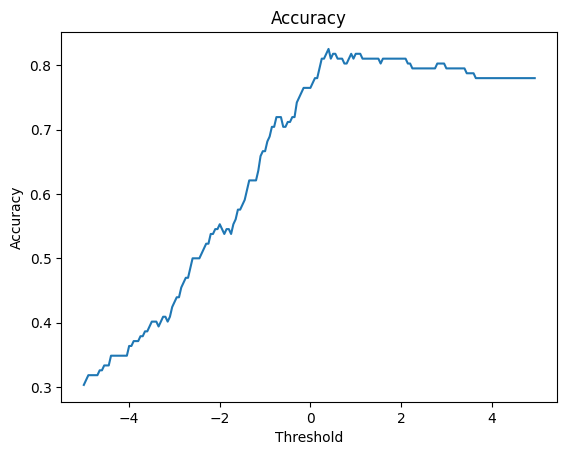

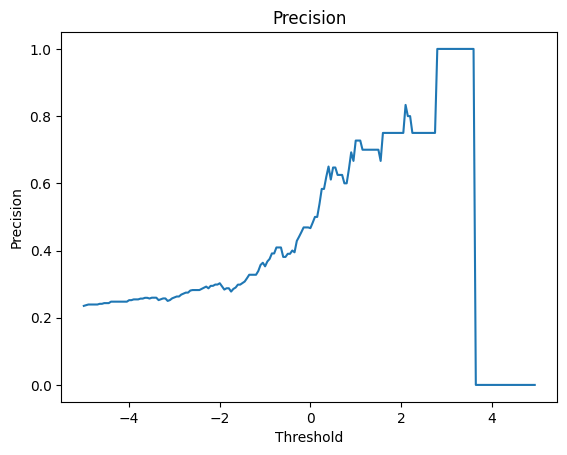

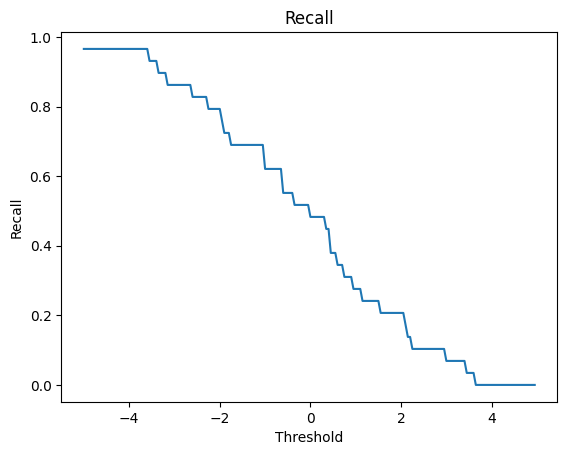

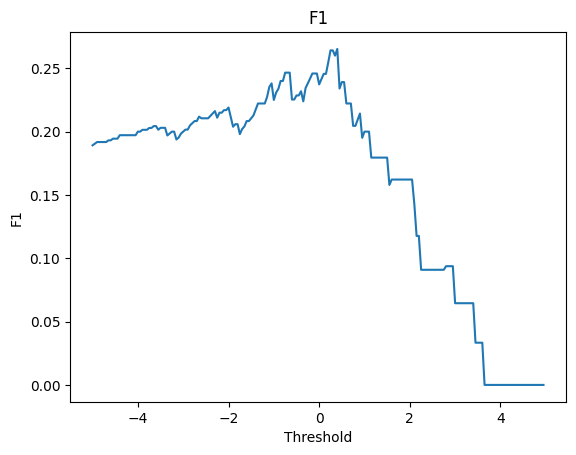

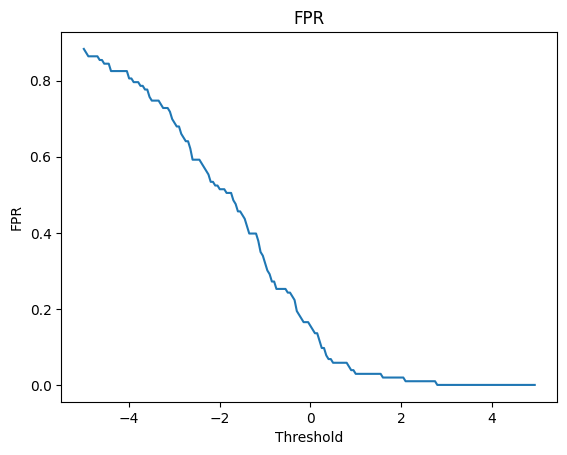

In [ ]:
for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
    plt.plot(np.arange(-5, 5, 0.05), hist[metric])
    plt.title(metric)
    plt.xlabel('Threshold')
    plt.ylabel(metric)
    plt.show()

### T17. Plot the RoC of your classifier.

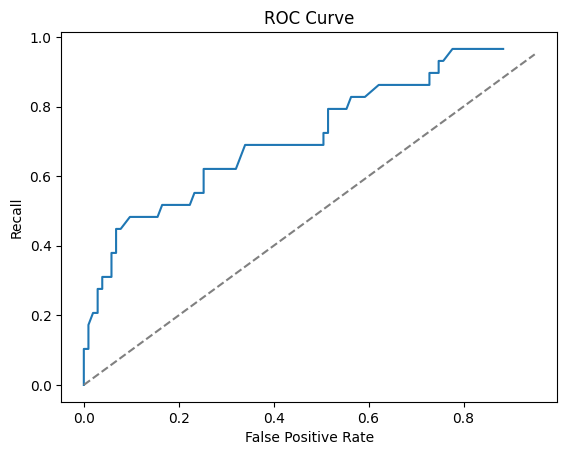

In [ ]:
plt.plot(hist['FPR'], hist['Recall'])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

plt.plot(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05), linestyle='--', color='gray')

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


In [ ]:
model.fit_params(x_train, y_train, 5)

best_acc_bin5 = float('-inf')
best_acc_t_bin5 = 0

best_f1_bin5 = float('-inf')
best_f1_t_bin5 = 0

hist_bin5 = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'FPR': []
}

for threshold in np.arange(-5, 5, 0.05):
    y_pred = model.predict(x_test, threshold)

    print(f"Threshold: {threshold:.2f}",end='\t| ')
    eva = evaluate(y_test, y_pred, show_result=False)
    for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
        print(f"{metric}: {eva[idx]:.2f}", end='\t| ')
        hist_bin5[metric].append(eva[idx])
    print()
    if eva[0] > best_acc_bin5:
        best_acc_bin5 = eva[0]
        best_acc_t_bin5 = threshold
    if eva[3] > best_f1_bin5:
        best_f1_bin5 = eva[3]
        best_f1_t_bin5 = threshold

print(f"Best threshold for accuracy: {best_acc_t_bin5:.2f} (Accuracy: {best_acc_bin5:.2f})")
print(f"Best threshold for F1: {best_f1_t_bin5:.2f} (F1: {best_f1_bin5:.2f})")

Threshold: -5.00	| Accuracy: 0.42	| Precision: 0.26	| Recall: 0.90	| F1: 0.20	| FPR: 0.71	| 
Threshold: -4.95	| Accuracy: 0.42	| Precision: 0.26	| Recall: 0.90	| F1: 0.20	| FPR: 0.71	| 
Threshold: -4.90	| Accuracy: 0.44	| Precision: 0.27	| Recall: 0.90	| F1: 0.21	| FPR: 0.69	| 
Threshold: -4.85	| Accuracy: 0.45	| Precision: 0.27	| Recall: 0.90	| F1: 0.21	| FPR: 0.68	| 
Threshold: -4.80	| Accuracy: 0.45	| Precision: 0.27	| Recall: 0.90	| F1: 0.21	| FPR: 0.68	| 
Threshold: -4.75	| Accuracy: 0.45	| Precision: 0.27	| Recall: 0.90	| F1: 0.21	| FPR: 0.68	| 
Threshold: -4.70	| Accuracy: 0.46	| Precision: 0.28	| Recall: 0.90	| F1: 0.21	| FPR: 0.66	| 
Threshold: -4.65	| Accuracy: 0.46	| Precision: 0.27	| Recall: 0.86	| F1: 0.21	| FPR: 0.65	| 
Threshold: -4.60	| Accuracy: 0.46	| Precision: 0.27	| Recall: 0.86	| F1: 0.21	| FPR: 0.65	| 
Threshold: -4.55	| Accuracy: 0.48	| Precision: 0.28	| Recall: 0.86	| F1: 0.21	| FPR: 0.63	| 
Threshold: -4.50	| Accuracy: 0.47	| Precision: 0.26	| Recall: 0.79	| F

In [ ]:
model.fit_params(x_train, y_train, 10)

best_acc_bin10 = float('-inf')
best_acc_t_bin10 = 0

best_f1_bin10 = float('-inf')
best_f1_t_bin10 = 0

hist_bin10 = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'FPR': []
}

for threshold in np.arange(-5, 5, 0.05):
    y_pred = model.predict(x_test, threshold)

    print(f"Threshold: {threshold:.2f}",end='\t| ')
    eva = evaluate(y_test, y_pred, show_result=False)
    for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
        print(f"{metric}: {eva[idx]:.2f}", end='\t| ')
        hist_bin10[metric].append(eva[idx])
    print()
    if eva[0] > best_acc_bin10:
        best_acc_bin10 = eva[0]
        best_acc_t_bin10 = threshold
    if eva[3] > best_f1_bin10:
        best_f1_bin10 = eva[3]
        best_f1_t_bin10 = threshold

print(f"Best threshold for accuracy: {best_acc_t_bin10:.2f} (Accuracy: {best_acc_bin10:.2f})")
print(f"Best threshold for F1: {best_f1_t_bin10:.2f} (F1: {best_f1_bin10:.2f})")

Threshold: -5.00	| Accuracy: 0.49	| Precision: 0.28	| Recall: 0.86	| F1: 0.21	| FPR: 0.61	| 
Threshold: -4.95	| Accuracy: 0.50	| Precision: 0.29	| Recall: 0.86	| F1: 0.22	| FPR: 0.60	| 
Threshold: -4.90	| Accuracy: 0.50	| Precision: 0.29	| Recall: 0.86	| F1: 0.22	| FPR: 0.60	| 
Threshold: -4.85	| Accuracy: 0.51	| Precision: 0.29	| Recall: 0.86	| F1: 0.22	| FPR: 0.59	| 
Threshold: -4.80	| Accuracy: 0.52	| Precision: 0.29	| Recall: 0.86	| F1: 0.22	| FPR: 0.58	| 
Threshold: -4.75	| Accuracy: 0.52	| Precision: 0.29	| Recall: 0.86	| F1: 0.22	| FPR: 0.58	| 
Threshold: -4.70	| Accuracy: 0.52	| Precision: 0.29	| Recall: 0.86	| F1: 0.22	| FPR: 0.58	| 
Threshold: -4.65	| Accuracy: 0.52	| Precision: 0.30	| Recall: 0.86	| F1: 0.22	| FPR: 0.57	| 
Threshold: -4.60	| Accuracy: 0.53	| Precision: 0.30	| Recall: 0.86	| F1: 0.22	| FPR: 0.56	| 
Threshold: -4.55	| Accuracy: 0.53	| Precision: 0.30	| Recall: 0.86	| F1: 0.22	| FPR: 0.56	| 
Threshold: -4.50	| Accuracy: 0.53	| Precision: 0.30	| Recall: 0.86	| F

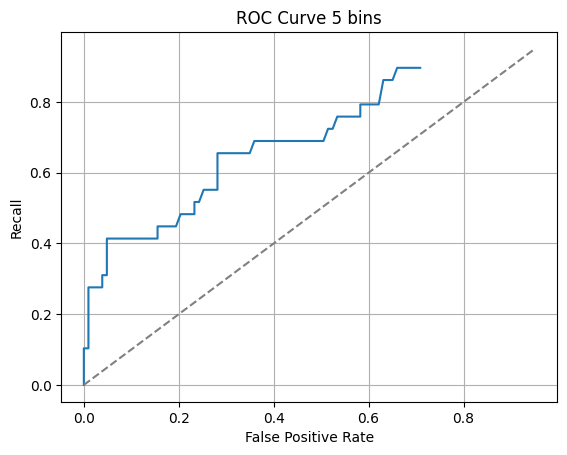

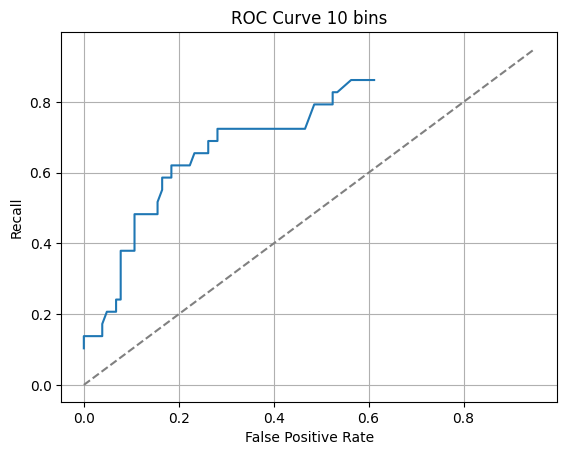

In [ ]:
plt.plot(hist_bin5['FPR'], hist_bin5['Recall'])
plt.title('ROC Curve 5 bins')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

plt.plot(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05), linestyle='--', color='gray')
plt.grid()

plt.show()


plt.plot(hist_bin10['FPR'], hist_bin10['Recall'])
plt.title('ROC Curve 10 bins')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

plt.plot(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05), linestyle='--', color='gray')
plt.grid()

plt.show()

### T19

Submitted the code

### OT4

In [ ]:
n_round=10
lst_accuracy=[]
for i in range(n_round):                                                                                                         #########
    X_train, X_test, y_train, y_test=train_test_split(df.loc[:, ~df.columns.isin(['Attrition'])],df["Attrition"],test_size=0.1,shuffle=True)
    X_train_leave = X_train.loc[df["Attrition"] == 1.0].copy()
    X_train_stay  = X_train.loc[df["Attrition"] == 0.0].copy()
    OT3model = SimpleBayesClassifier(n_pos =X_train_leave.shape[0] , n_neg = X_train_stay.shape[0])
    a,b=model.fit_params(X_train.to_numpy(), y_train.to_numpy())
    y_pred = model.predict(X_test.to_numpy())
    accuracy, precision, recall, F1, fpr = evaluate(y_test.to_numpy(),y_pred, show_result=False)
    lst_accuracy.append(accuracy)
    lst_accuracy += [accuracy]
print("Mean : ", np.mean(lst_accuracy))   
print("Variance :", np.var(lst_accuracy))

c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\V

Mean :  0.8204081627072053
Variance : 0.0008626035436456782


c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
c:\Users\Vivobook\github\my-chula-courses\2110573-patt-recog\HW2\SimpleBayesClassifier.py:94: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])
